# Discret Fourier Transformation 

The Fourier Transform will decompose an image into its sinus and cosines components. In other words, it will transform an image from its spatial domain to its frequency domain. The idea is that any function may be approximated exactly with the sum of infinite sinus and cosines functions. The Fourier Transform is a way how to do this. Mathematically a two dimensional images Fourier transform is:
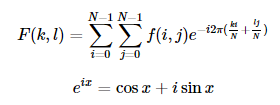



Here f is the image value in its spatial domain and F in its frequency domain. The result of the transformation is complex numbers. Displaying this is possible either via a real image and a complex image or via a magnitude and a phase image. However, throughout the image processing algorithms only the magnitude image is interesting as this contains all the information we need about the images geometric structure. Nevertheless, if you intend to make some modifications of the image in these forms and then you need to retransform it you'll need to preserve both of these.

In [84]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#### Expand the image to an optimal size

The performance of a DFT is dependent of the image size. It tends to be the fastest for image sizes that are multiple of the numbers two, three and five. Therefore, to achieve maximal performance it is generally a good idea to pad border values to the image to get a size with such traits. The getOptimalDFTSize() returns this optimal size and we can use the copyMakeBorder() function to expand the borders of an image (the appended pixels are initialized with zero):

In [85]:
I = cv.imread("cp.tif", cv.IMREAD_GRAYSCALE)
rows, cols = I.shape
m = cv.getOptimalDFTSize( rows )
n = cv.getOptimalDFTSize( cols )
padded = cv.copyMakeBorder(I, 0, m - rows, 0, n - cols, cv.BORDER_CONSTANT, value=[1,0,2])

print(m,n)

768 1200


Text(0.5, 1.0, 'Padded Image')

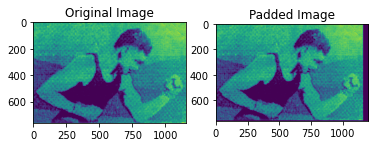

In [86]:
plt.subplot(121)
plt.imshow(I)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(padded)
plt.title("Padded Image")

#### Make place for both the complex and the real values

The result of a Fourier Transform is complex. This implies that for each image value the result is two image values (one per component). Moreover, the frequency domains range is much larger than its spatial counterpart. Therefore, we store these usually at least in a float format. Therefore we'll convert our input image to this type and expand it with another channel to hold the complex values:

In [87]:
planes = [np.float32(padded), np.zeros(padded.shape, np.float32)]
complexI = cv.merge(planes)         # Add to the expanded another plane with zeros

#print(planes)
print(complexI)

[[[121.   0.]
  [135.   0.]
  [146.   0.]
  ...
  [  1.   0.]
  [  1.   0.]
  [  1.   0.]]

 [[139.   0.]
  [145.   0.]
  [135.   0.]
  ...
  [  1.   0.]
  [  1.   0.]
  [  1.   0.]]

 [[144.   0.]
  [135.   0.]
  [132.   0.]
  ...
  [  1.   0.]
  [  1.   0.]
  [  1.   0.]]

 ...

 [[  1.   0.]
  [  1.   0.]
  [  1.   0.]
  ...
  [  1.   0.]
  [  1.   0.]
  [  1.   0.]]

 [[  1.   0.]
  [  1.   0.]
  [  1.   0.]
  ...
  [  1.   0.]
  [  1.   0.]
  [  1.   0.]]

 [[  1.   0.]
  [  1.   0.]
  [  1.   0.]
  ...
  [  1.   0.]
  [  1.   0.]
  [  1.   0.]]]


#### Make the Discrete Fourier Transform

It's possible an in-place calculation (same input as output):

In [88]:
cv.dft(complexI, complexI)         # this way the result may fit in the source matrix

array([[[ 98663624.  ,         0.  ],
        [  3208275.2 ,   8220055.  ],
        [ -9373256.  ,   5788732.  ],
        ...,
        [ -5761814.  ,  -1852067.  ],
        [ -9373256.  ,  -5788733.  ],
        [  3208275.2 ,  -8220055.  ]],

       [[  3758781.5 , -15232088.  ],
        [ -5273575.  ,   2889381.2 ],
        [  6302466.5 ,    322939.3 ],
        ...,
        [  2402560.5 ,   5148272.5 ],
        [ -4232961.  ,  -3065955.5 ],
        [  6508369.  ,    776904.94]],

       [[  2701155.2 ,  -3423811.5 ],
        [ -6358318.  ,  -5539806.5 ],
        [ -1253103.  ,    467528.8 ],
        ...,
        [  2373976.  ,   1424967.2 ],
        [   439839.38,  -1430419.1 ],
        [  -562446.9 ,  -3183995.5 ]],

       ...,

       [[  -482355.6 ,   3005689.  ],
        [ -1099682.9 ,   1655642.1 ],
        [  3770767.8 ,  -3908615.5 ],
        ...,
        [  -608245.2 ,  -1698140.8 ],
        [  2498712.2 ,   3769808.  ],
        [   796939.  ,  -3622757.8 ]],

       [[  2701

##### Transform the real and complex values to magnitude

A complex number has a real (Re) and a complex (imaginary - Im) part. The results of a DFT are complex numbers. The magnitude of a DFT is:

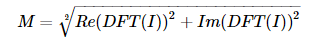
Translated to OpenCV code:

In [89]:
cv.split(complexI, planes)                   # planes[0] = Re(DFT(I), planes[1] = Im(DFT(I))
cv.magnitude(planes[0], planes[1], planes[0])# planes[0] = magnitude
magI = planes[0]

In [98]:
#plt.imshow(magI)

print(magI)

[[0.05344617 0.2846331  0.2846002  ... 0.35402352 0.28459987 0.28463298]
 [0.35834652 0.24345288 0.31905684 ... 0.24537472 0.31596053 0.34340492]
 [0.3720134  0.32937413 0.320349   ... 0.31912833 0.24689387 0.39956576]
 ...
 [0.3400958  0.3503035  0.31374887 ... 0.28990674 0.3622835  0.2523651 ]
 [0.37201336 0.39956576 0.24689381 ... 0.22768737 0.3203489  0.32937413]
 [0.35834646 0.3434049  0.31596068 ... 0.32099745 0.31905705 0.2434539 ]]


#### Switch to a logarithmic scale

It turns out that the dynamic range of the Fourier coefficients is too large to be displayed on the screen. We have some small and some high changing values that we can't observe like this. Therefore the high values will all turn out as white points, while the small ones as black. To use the gray scale values to for visualization we can transform our linear scale to a logarithmic one:

M1=log(1+M)

Translated to OpenCV code:

In [91]:
matOfOnes = np.ones(magI.shape, dtype=magI.dtype)
cv.add(matOfOnes, magI, magI) #  switch to logarithmic scale
cv.log(magI, magI)

array([[18.407227 , 15.992982 , 16.214922 , ..., 15.615926 , 16.214922 ,
        15.992982 ],
       [16.56847  , 15.609475 , 15.657763 , ..., 15.552689 , 15.469284 ,
        15.695674 ],
       [15.288223 , 15.947679 , 14.1062975, ..., 14.833927 , 14.218651 ,
        14.989012 ],
       ...,
       [14.928732 , 14.502426 , 15.507637 , ..., 14.405399 , 15.324625 ,
        15.126375 ],
       [15.288222 , 14.989012 , 14.218651 , ..., 15.176602 , 14.1062975,
        15.947679 ],
       [16.56847  , 15.695674 , 15.469284 , ..., 14.935036 , 15.657763 ,
        15.609475 ]], dtype=float32)

In [92]:
print(matOfOnes)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


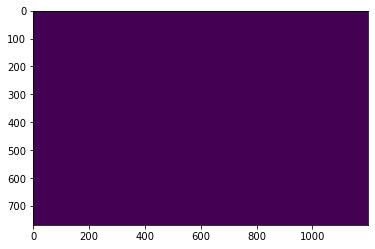

In [93]:
plt.imshow(matOfOnes)

#### Crop and rearrange

In [94]:
magI_rows, magI_cols = magI.shape
# crop the spectrum, if it has an odd number of rows or columns
magI = magI[0:(magI_rows & -2), 0:(magI_cols & -2)]

cx = int(magI_rows//2)
cy = int(magI_cols//2)

q0 = magI[0:cx, 0:cy]         # Top-Left - Create a ROI per quadrant
q1 = magI[cx:cx+cx, 0:cy]     # Top-Right
q2 = magI[0:cx, cy:cy+cy]     # Bottom-Left
q3 = magI[cx:cx+cx, cy:cy+cy] # Bottom-Right


tmp = np.copy(q0)               # swap quadrants (Top-Left with Bottom-Right)
magI[0:cx, 0:cy] = q3
magI[cx:cx + cx, cy:cy + cy] = tmp


tmp = np.copy(q1)               # swap quadrant (Top-Right with Bottom-Left)
magI[cx:cx + cx, 0:cy] = q2
magI[0:cx, cy:cy + cy] = tmp

In [95]:
#print(cx,cy)
print(tmp)
#print(q1,q2,q3)

[[11.941905  10.176183   9.541116  ...  7.5957026  6.433779   6.434333 ]
 [11.955605  10.228201   9.268314  ...  5.777279   6.9586535  7.417982 ]
 [11.954981  10.239452   9.33121   ...  7.011672   5.8027043  8.35793  ]
 ...
 [14.928732  14.502426  15.507637  ...  8.667186   7.42534    7.892184 ]
 [15.288222  14.989012  14.218651  ...  8.930812   7.7950954  7.570236 ]
 [16.56847   15.695674  15.469284  ...  9.695028   9.793134   9.884759 ]]


In [96]:
 imggg = cv.normalize(magI, magI, 0, 1, cv.NORM_MINMAX) # Transform the matrix with float values into a

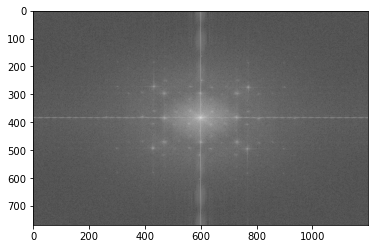

In [97]:
plt.imshow(imggg, cmap = 'gray')